# Assignment-11-Text Mining-02-Amazon Product Reviews
1.Extract reviews of any product from ecommerce website like amazon,

2.Perform emotion mining

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_csv('extract_reviews.csv')
reviews

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Attractive for kid...
1,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Use full\n \n
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Easy to teach\n \n
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Product is good an...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Bought this as a g...
5,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Nice product for k...
6,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Must have for kids...
7,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Books r very nice ...
8,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n good\n \n
9,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n My kid loves these...


# Text Preprocessing

In [3]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Attractive for kids as these are small in size good for upto 3 to 4 years kids',
 'Use full',
 'Easy to teach',
 'Product is good and as nice as it shown in the pic and got what I want',
 'Bought this as a gift for a 1st birthday. The child as well as the parents loved it. Set of 10 books with all basics for a child that has just started to speak words. Real good deal for the price. Comes is a neat box too s totally giftable!',
 'Nice product for kids. Total value the cost. Quality is also great.',
 'Must have for kids. Gives a lot of interactions content with your kids',
 'Books r very nice quality...as shown in picture my daughter loved it.....',
 'good',
 'My kid loves these books.']

# Joining the list into one string/text

In [4]:
reviews_text=' '.join(reviews)
reviews_text

'Attractive for kids as these are small in size good for upto 3 to 4 years kids Use full Easy to teach Product is good and as nice as it shown in the pic and got what I want Bought this as a gift for a 1st birthday. The child as well as the parents loved it. Set of 10 books with all basics for a child that has just started to speak words. Real good deal for the price. Comes is a neat box too s totally giftable! Nice product for kids. Total value the cost. Quality is also great. Must have for kids. Gives a lot of interactions content with your kids Books r very nice quality...as shown in picture my daughter loved it..... good My kid loves these books.'

# Remove Punctuations

In [5]:
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Attractive for kids as these are small in size good for upto 3 to 4 years kids Use full Easy to teach Product is good and as nice as it shown in the pic and got what I want Bought this as a gift for a 1st birthday The child as well as the parents loved it Set of 10 books with all basics for a child that has just started to speak words Real good deal for the price Comes is a neat box too s totally giftable Nice product for kids Total value the cost Quality is also great Must have for kids Gives a lot of interactions content with your kids Books r very nice qualityas shown in picture my daughter loved it good My kid loves these books'

# Tokenization

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saishree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saishree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Attractive', 'for', 'kids', 'as', 'these', 'are', 'small', 'in', 'size', 'good', 'for', 'upto', '3', 'to', '4', 'years', 'kids', 'Use', 'full', 'Easy', 'to', 'teach', 'Product', 'is', 'good', 'and', 'as', 'nice', 'as', 'it', 'shown', 'in', 'the', 'pic', 'and', 'got', 'what', 'I', 'want', 'Bought', 'this', 'as', 'a', 'gift', 'for', 'a', '1st', 'birthday', 'The', 'child']


In [8]:
len(text_tokens)

132

In [9]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Attractive', 'kids', 'small', 'size', 'good', 'upto', '3', '4', 'years', 'kids', 'Use', 'full', 'Easy', 'teach', 'Product', 'good', 'nice', 'shown', 'pic', 'got', 'want', 'Bought', 'gift', '1st', 'birthday', 'child', 'well', 'parents', 'loved', 'Set', '10', 'books', 'basics', 'child', 'started', 'speak', 'words', 'Real', 'good', 'deal', 'price', 'Comes', 'neat', 'box', 'totally', 'giftable', 'Nice', 'product', 'kids', 'Total', 'value', 'cost', 'Quality', 'also', 'great', 'Must', 'kids', 'Gives', 'lot', 'interactions', 'content', 'kids', 'Books', 'r', 'nice', 'qualityas', 'shown', 'picture', 'daughter', 'loved', 'good', 'My', 'kid', 'loves', 'books']


# Normalize the data

In [10]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['attractive', 'kids', 'small', 'size', 'good', 'upto', '3', '4', 'years', 'kids', 'use', 'full', 'easy', 'teach', 'product', 'good', 'nice', 'shown', 'pic', 'got', 'want', 'bought', 'gift', '1st', 'birthday', 'child', 'well', 'parents', 'loved', 'set', '10', 'books', 'basics', 'child', 'started', 'speak', 'words', 'real', 'good', 'deal', 'price', 'comes', 'neat', 'box', 'totally', 'giftable', 'nice', 'product', 'kids', 'total', 'value', 'cost', 'quality', 'also', 'great', 'must', 'kids', 'gives', 'lot', 'interactions', 'content', 'kids', 'books', 'r', 'nice', 'qualityas', 'shown', 'picture', 'daughter', 'loved', 'good', 'my', 'kid', 'loves', 'books']


In [ ]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

# Lemmatization

In [11]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

attractive kids small size good upto 3 4 years kids use full easy teach product good nice shown pic got want bought gift 1st birthday child well parents loved set 10 books basics child started speak words real good deal price comes neat box totally giftable nice product kids total value cost quality also great must kids gives lot interactions content kids books r nice qualityas shown picture daughter loved good my kid loves books


In [12]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['attractive', 'kid', 'small', 'size', 'good', 'upto', '3', '4', 'year', 'kid', 'use', 'full', 'easy', 'teach', 'product', 'good', 'nice', 'show', 'pic', 'get', 'want', 'buy', 'gift', '1st', 'birthday', 'child', 'well', 'parent', 'love', 'set', '10', 'book', 'basic', 'child', 'start', 'speak', 'word', 'real', 'good', 'deal', 'price', 'come', 'neat', 'box', 'totally', 'giftable', 'nice', 'product', 'kid', 'total', 'value', 'cost', 'quality', 'also', 'great', 'must', 'kid', 'give', 'lot', 'interaction', 'content', 'kid', 'book', 'r', 'nice', 'qualityas', 'show', 'picture', 'daughter', 'love', 'good', 'my', 'kid', 'love', 'book']


In [13]:
clean_reviews=' '.join(lemmas)
clean_reviews

'attractive kid small size good upto 3 4 year kid use full easy teach product good nice show pic get want buy gift 1st birthday child well parent love set 10 book basic child start speak word real good deal price come neat box totally giftable nice product kid total value cost quality also great must kid give lot interaction content kid book r nice qualityas show picture daughter love good my kid love book'

# Feature Extaction

# Using CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [15]:
print(cv.vocabulary_)

{'attractive': 3, 'kid': 24, 'small': 42, 'size': 41, 'good': 21, 'upto': 48, 'year': 54, 'use': 49, 'full': 16, 'easy': 15, 'teach': 45, 'product': 35, 'nice': 30, 'show': 40, 'pic': 32, 'get': 17, 'want': 51, 'buy': 8, 'gift': 18, '1st': 1, 'birthday': 5, 'child': 9, 'well': 52, 'parent': 31, 'love': 26, 'set': 39, '10': 0, 'book': 6, 'basic': 4, 'start': 44, 'speak': 43, 'word': 53, 'real': 38, 'deal': 14, 'price': 34, 'come': 10, 'neat': 29, 'box': 7, 'totally': 47, 'giftable': 19, 'total': 46, 'value': 50, 'cost': 12, 'quality': 36, 'also': 2, 'great': 22, 'must': 27, 'give': 20, 'lot': 25, 'interaction': 23, 'content': 11, 'qualityas': 37, 'picture': 33, 'daughter': 13, 'my': 28}


In [17]:
print(cv.get_feature_names()[15:30])

['easy', 'full', 'get', 'gift', 'giftable', 'give', 'good', 'great', 'interaction', 'kid', 'lot', 'love', 'must', 'my', 'neat']


In [18]:
print(reviewscv.toarray()[15:30])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 

In [19]:
print(reviewscv.toarray().shape)

(75, 55)


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [20]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [21]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', '1st', 'also', 'attractive', 'basic', 'birthday', 'book', 'box', 'buy', 'child', 'come', 'content', 'cost', 'daughter', 'deal', 'easy', 'full', 'get', 'gift', 'giftable', 'give', 'good', 'great', 'interaction', 'kid', 'lot', 'love', 'must', 'my', 'neat', 'nice', 'parent', 'pic', 'picture', 'price', 'product', 'quality', 'qualityas', 'real', 'set', 'show', 'size', 'small', 'speak', 'start', 'teach', 'total', 'totally', 'upto', 'use', 'value', 'want', 'well', 'word', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TF-IDF Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [23]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '1st', 'also', 'attractive', 'basic', 'birthday', 'book', 'box', 'buy', 'child', 'come', 'content', 'cost', 'daughter', 'deal', 'easy', 'full', 'get', 'gift', 'giftable', 'give', 'good', 'great', 'interaction', 'kid', 'lot', 'love', 'must', 'my', 'neat', 'nice', 'parent', 'pic', 'picture', 'price', 'product', 'quality', 'qualityas', 'real', 'set', 'show', 'size', 'small', 'speak', 'start', 'teach', 'total', 'totally', 'upto', 'use', 'value', 'want', 'well', 'word', 'year']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\Saishree\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Generate Word Cloud

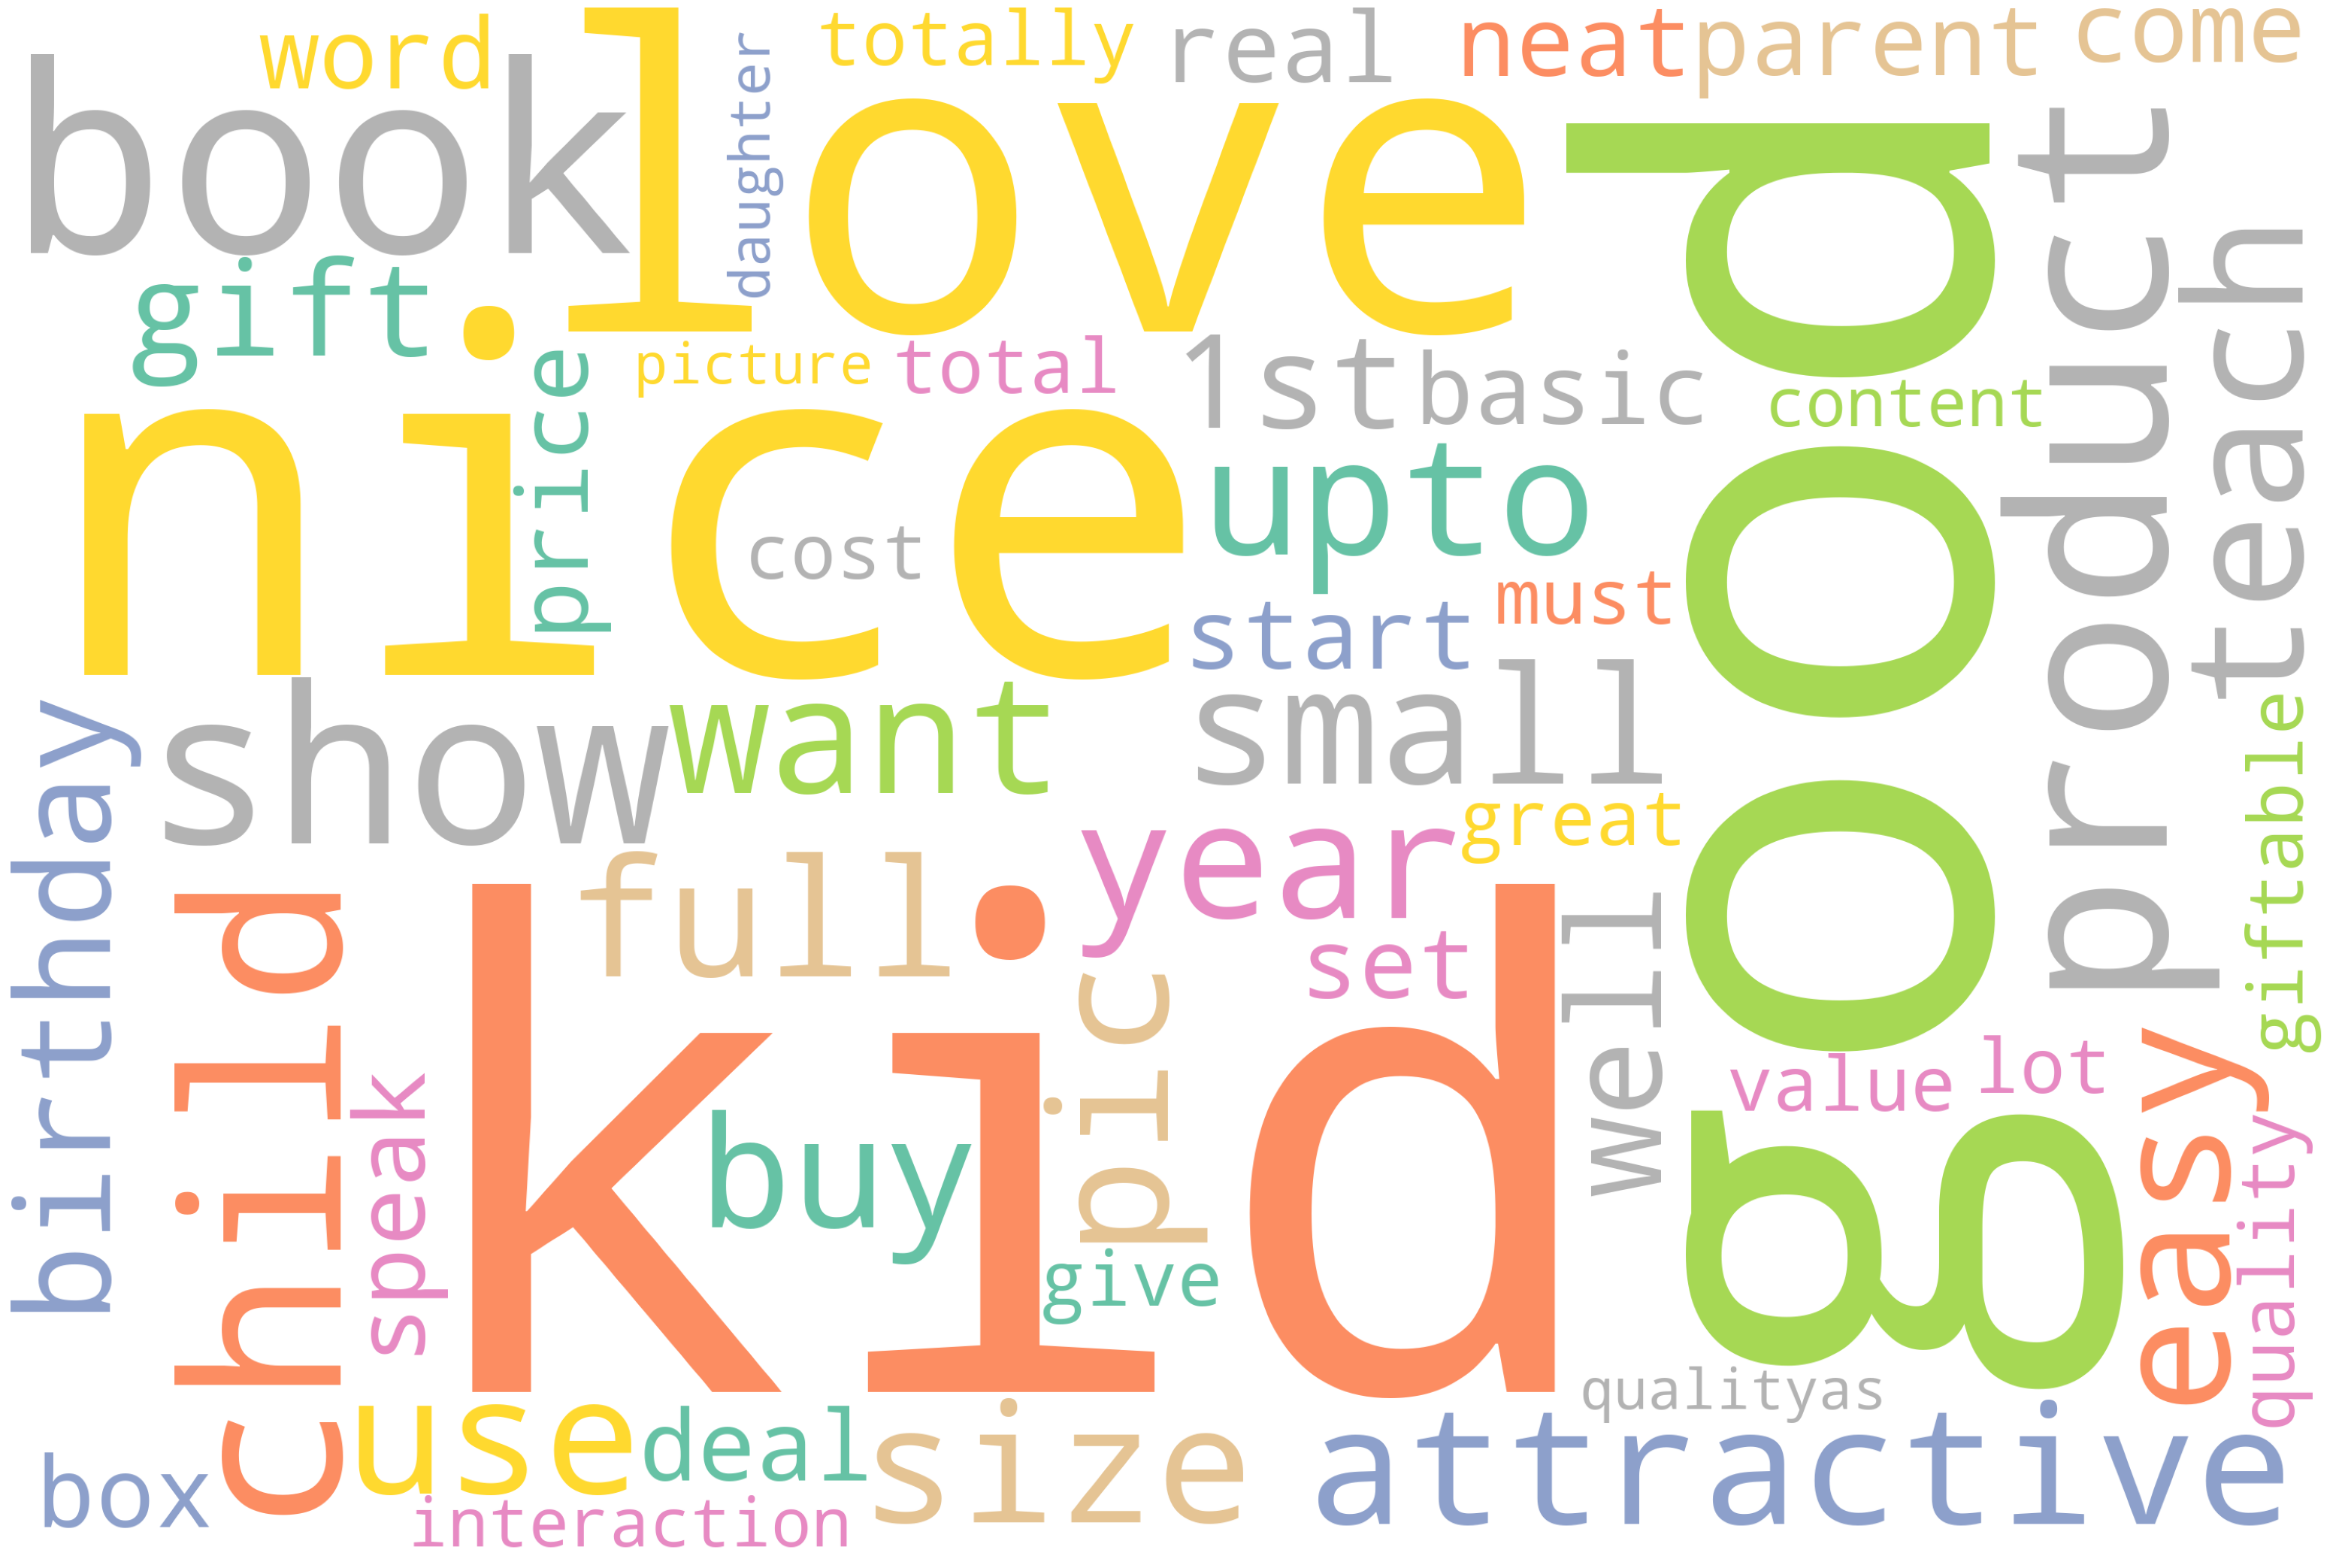

In [24]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [25]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [27]:
for token in doc_block[10:50]:
    print(token,token.pos_)

use NOUN
full ADJ
easy ADJ
teach NOUN
product NOUN
good ADJ
nice ADJ
show NOUN
pic NOUN
get AUX
want VERB
buy VERB
gift NOUN
1st ADJ
birthday NOUN
child NOUN
well INTJ
parent NOUN
love NOUN
set VERB
10 NUM
book NOUN
basic ADJ
child NOUN
start NOUN
speak ADJ
word NOUN
real ADJ
good ADJ
deal NOUN
price NOUN
come VERB
neat ADJ
box NOUN
totally ADV
giftable VERB
nice ADJ
product NOUN
kid ADJ
total ADJ


In [28]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[10:50])

['buy', 'gift', 'birthday', 'child', 'parent', 'love', 'set', 'book', 'child', 'start', 'word', 'deal', 'price', 'come', 'box', 'giftable', 'product', 'value', 'cost', 'quality', 'give', 'lot', 'interaction', 'content', 'book', 'r', 'qualityas', 'show', 'daughter', 'love', 'love', 'book']


In [29]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,love,3
1,book,3
2,product,2
3,show,2
4,child,2
5,size,1
6,upto,1
7,year,1
8,kid,1
9,use,1


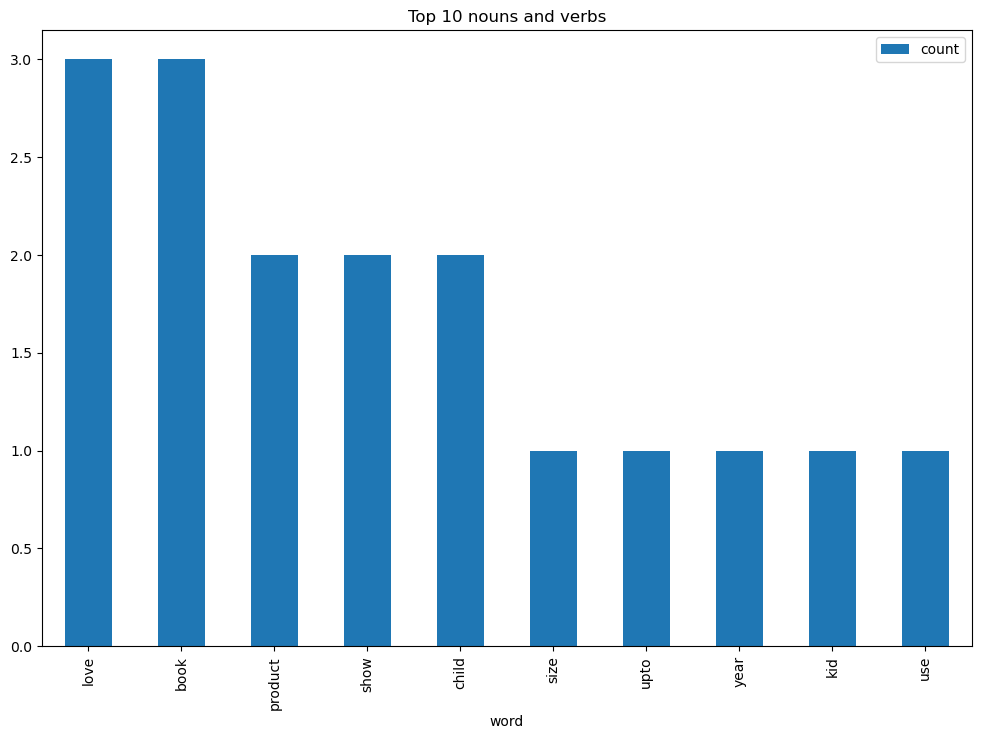

In [30]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [31]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Attractive for kids as these are small in size good for upto 3 to 4 years kids Use full Easy to teach Product is good and as nice as it shown in the pic and got what I want Bought this as a gift for a 1st birthday.',
 'The child as well as the parents loved it.',
 'Set of 10 books with all basics for a child that has just started to speak words.',
 'Real good deal for the price.',
 'Comes is a neat box too s totally giftable!',
 'Nice product for kids.',
 'Total value the cost.',
 'Quality is also great.',
 'Must have for kids.',
 'Gives a lot of interactions content with your kids Books r very nice quality...as shown in picture my daughter loved it..... good My kid loves these books.']

In [32]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Attractive for kids as these are small in size...
1,The child as well as the parents loved it.
2,Set of 10 books with all basics for a child th...
3,Real good deal for the price.
4,Comes is a neat box too s totally giftable!
5,Nice product for kids.
6,Total value the cost.
7,Quality is also great.
8,Must have for kids.
9,Gives a lot of interactions content with your ...
